# [학교 밖 교육] 우주 데이터 AI 코딩  

---
1. 작성자: (화천 조경철 천문대) 김영호 

2. 작성일(수정일): 2023. 3. 9 

3. 작성 목적: 학교 밖 교육(안) 관련 아이디어 논의를 위한 회의 자료용 시안 코드

4. 코드 설명(요약)

   - 별의 표면 온도, 광도, 반지름 및 절대 온도 등으로 이루어진 오픈 데이터 셋을 활용
   
   - 탐색적 자료분석의 일환으로 기초 통계량 산출, H-R도 그래프 생성 및 별의 타입 분류 머신러닝 모델 수립
    
---

# 1. 데이터 불러오기

- 데이터 소스: https://www.kaggle.com/datasets/deepu1109/star-dataset


- 데이터 구성 변수 

> **1. Absolute Temperature** (in K)
>
> **2. Relative Luminosity** (L/Lo)
>
> **3. Relative Radius** (R/Ro)
>
> **4. Absolute Magnitude** (Mv)
>
> **5. Star Color** (white,Red,Blue,Yellow,yellow-orange etc)
>
> **6. Spectral Class** (O,B,A,F,G,K,,M)
>
> **7. Star Type** target variable (하단 설명 참조)
>


- 타겟 변수 설명 (240개의 별을 6개의 타입으로 분류)

> **Brown Dwarf** -> Star Type = 0
>
> **Red Dwarf** -> Star Type = 1
>
> **White Dwarf** -> Star Type = 2
>
> **Main Sequence** -> Star Type = 3
>
> **Supergiant** -> Star Type = 4
>
> **Hypergiant** -> Star Type = 5
>


- 기준값

> **Lo** = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
>
> **Ro** = 6.9551 x 10^8 m (Avg Radius of Sun)


## 1.1 환경 설정

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'E:\\astro_data_in_python'

In [3]:
os.listdir('E:\\astro_data_in_python')

['.ipynb_checkpoints',
 '6_class_csv.csv',
 '6_class_star_proto.ipynb',
 '6_class_star_sample.py.ipynb',
 'confusion_matrix.png',
 'confusion_matrix2.png',
 'Hertzsprung-Russell-master',
 'Hertzsprung-Russell.gif',
 'Hertzsprung-Russell.ipynb',
 'hr_diagram.jpg',
 'README.md',
 'sample_code_1.py.ipynb']

In [4]:
sns.set()

## 1.2 데이터 불러오기

판다스의 read_csv 함수 이용

In [5]:
star_df = pd.read_csv('6_class_csv.csv')

In [6]:
star_df.head()

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M

In [7]:
# 데이터 차원 확인
star_df.shape

(240, 7)

In [8]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [9]:
# 컬럼명 재구성

# snake case vs camel case

star_df.columns = ['temperature', 'luminosity', 'radius', 'absolute_magnitude', 
                   'star_type', 'star_color', 'spectral_class']

In [10]:
star_df.head()

temperature  luminosity  radius  absolute_magnitude  star_type star_color  \
0         3068    0.002400  0.1700               16.12          0        Red   
1         3042    0.000500  0.1542               16.60          0        Red   
2         2600    0.000300  0.1020               18.70          0        Red   
3         2800    0.000200  0.1600               16.65          0        Red   
4         1939    0.000138  0.1030               20.06          0        Red   

  spectral_class  
0              M  
1              M  
2              M  
3              M  
4              M

In [11]:
star_df['star_type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: star_type, dtype: int64

In [12]:
star_df['star_color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: star_color, dtype: int64

---

# 2. 탐색적 자료 분석(EDA)

## 2.1 기초 통계량(기술통계량) 확인

In [13]:
# describe() 함수 이용 확인
pd.set_option("display.precision", 2)

star_df.describe()

temperature  luminosity    radius  absolute_magnitude  star_type
count       240.00    2.40e+02  2.40e+02              240.00     240.00
mean      10497.46    1.07e+05  2.37e+02                4.38       2.50
std        9552.43    1.79e+05  5.17e+02               10.53       1.71
min        1939.00    8.00e-05  8.40e-03              -11.92       0.00
25%        3344.25    8.65e-04  1.03e-01               -6.23       1.00
50%        5776.00    7.05e-02  7.62e-01                8.31       2.50
75%       15055.50    1.98e+05  4.28e+01               13.70       4.00
max       40000.00    8.49e+05  1.95e+03               20.06       5.00

In [14]:
# star_type별 기초통계량 확인
grp_df = star_df.groupby("star_type")
grp_df.describe()['temperature']

count      mean       std     min      25%      50%       75%  \
star_type                                                                  
0           40.0   2997.95    332.28  1939.0  2812.75   2935.0   3242.50   
1           40.0   3283.82    269.64  2621.0  3132.75   3314.0   3527.50   
2           40.0  13931.45   4957.66  7100.0  9488.75  13380.0  17380.00   
3           40.0  16018.00  10661.23  4077.0  7479.25  12560.5  23030.00   
4           40.0  15347.85  10086.78  3008.0  6899.50  12821.0  23181.25   
5           40.0  11405.70  11816.99  3399.0  3603.75   3766.0  18976.00   

               max  
star_type           
0           3531.0  
1           3692.0  
2          25000.0  
3          39000.0  
4          40000.0  
5          38940.0

### 2.1.1 Temperature 기초 통계량

In [15]:
star_df['temperature'].mean()

10497.4625

In [16]:
star_df['temperature'].median()

5776.0

In [17]:
star_df['temperature'].std()

9552.42503716402

In [18]:
star_df['temperature'].min()

1939

In [19]:
star_df['temperature'].quantile([.25, .5, .75])

0.25     3344.25
0.50     5776.00
0.75    15055.50
Name: temperature, dtype: float64

In [20]:
star_df['temperature'].max()

40000

### 2.1.2 luminosity 기초 통계량

In [21]:
star_df['luminosity'].mean()

107188.36163460833

In [22]:
star_df['luminosity'].median()

0.07050000000000001

In [23]:
star_df['luminosity'].std()

179432.2449402145

In [24]:
star_df['luminosity'].min()

8e-05

In [25]:
star_df['luminosity'].quantile([.25, .5, .75])

0.25    8.65e-04
0.50    7.05e-02
0.75    1.98e+05
Name: luminosity, dtype: float64

In [26]:
star_df['luminosity'].max()

849420.0

### 2.1.3 radius 기초 통계량

In [27]:
star_df['radius'].mean()

237.15778137500004

In [28]:
star_df['radius'].median()

0.7625

In [29]:
star_df['radius'].std()

517.1557634028478

In [30]:
star_df['radius'].min()

0.0084

In [31]:
star_df['radius'].quantile([.25, .5, .75])

0.25     0.10
0.50     0.76
0.75    42.75
Name: radius, dtype: float64

In [32]:
star_df['radius'].max()

1948.5

### 2.1.4 absolute_magnitude 기초 통계량

In [33]:
star_df['absolute_magnitude'].mean()

4.382395833333335

In [34]:
star_df['absolute_magnitude'].median()

8.312999999999999

In [35]:
star_df['absolute_magnitude'].std()

10.53251235061617

In [36]:
star_df['absolute_magnitude'].min()

-11.92

In [37]:
star_df['absolute_magnitude'].quantile([.25, .5, .75])

0.25    -6.23
0.50     8.31
0.75    13.70
Name: absolute_magnitude, dtype: float64

In [38]:
star_df['absolute_magnitude'].max()

20.06

### 2.1.5 star_type별 그룹 간 차이 검정

In [39]:
grp_df.describe().transpose()

star_type                        0         1         2          3          4  \
temperature        count  4.00e+01  4.00e+01  4.00e+01      40.00      40.00   
                   mean   3.00e+03  3.28e+03  1.39e+04   16018.00   15347.85   
                   std    3.32e+02  2.70e+02  4.96e+03   10661.23   10086.78   
                   min    1.94e+03  2.62e+03  7.10e+03    4077.00    3008.00   
                   25%    2.81e+03  3.13e+03  9.49e+03    7479.25    6899.50   
                   50%    2.94e+03  3.31e+03  1.34e+04   12560.50   12821.00   
                   75%    3.24e+03  3.53e+03  1.74e+04   23030.00   23181.25   
                   max    3.53e+03  3.69e+03  2.50e+04   39000.00   40000.00   
luminosity         count  4.00e+01  4.00e+01  4.00e+01      40.00      40.00   
                   mean   6.93e-04  5.41e-03  2.43e-03   32067.39  301816.25   
                   std    8.88e-04  7.33e-03  8.91e-03   69351.20  175756.38   
                   min    1.38e-04  1.90e-04  8.00e-05       0.09  112000.00   
                   25%    3.15e-04  1.31e-03  2.87e-04       6.30  197250.00   
                   50%    5.20e-04  3.15e-03  7.60e-04     738.50  242145.00   
                   75%    7.37e-04  6.67e-03  1.23e-03   12962.50  344160.00   
                   max    5.60e-03  3.90e-02  5.60e-02  204000.00  813000.00   
radius             count  4.00e+01  4.00e+01  4.00e+01      40.00      40.00   
                   mean   1.10e-01  3.48e-01  1.07e-02       4.43      51.15   
                   std    2.58e-02  1.54e-01  1.73e-03       2.80      27.66   
                   min    5.70e-02  9.80e-02  8.40e-03       0.80      12.00   
                   25%    9.32e-02  2.40e-01  9.30e-03       1.29      25.75   
                   50%    1.06e-01  3.38e-01  1.02e-02       5.71      43.50   
                   75%    1.20e-01  4.10e-01  1.20e-02       6.37      80.25   
                   max    1.90e-01  7.30e-01  1.50e-02      10.60      98.00   
absolute_magnitude count  4.00e+01  4.00e+01  4.00e+01      40.00      40.00   
                   mean   1.76e+01  1.25e+01  1.26e+01      -0.37      -6.37   
                   std    1.21e+00  1.42e+00  1.28e+00       3.61       0.56   
                   min    1.61e+01  1.01e+01  1.02e+01      -4.70      -7.45   
                   25%    1.67e+01  1.14e+01  1.16e+01      -3.70      -6.81   
                   50%    1.71e+01  1.26e+01  1.23e+01      -1.18      -6.24   
                   75%    1.84e+01  1.36e+01  1.38e+01       2.42      -5.96   
                   max    2.01e+01  1.49e+01  1.49e+01       6.51      -5.24   

star_type                         5  
temperature        count      40.00  
                   mean    11405.70  
                   std     11816.99  
                   min      3399.00  
                   25%      3603.75  
                   50%      3766.00  
                   75%     18976.00  
                   max     38940.00  
luminosity         count      40.00  
                   mean   309246.53  
                   std    199344.00  
                   min     74000.00  
                   25%    173000.00  
                   50%    266500.00  
                   75%    365957.50  
                   max    849420.00  
radius             count      40.00  
                   mean     1366.90  
                   std       255.56  
                   min       708.90  
                   25%      1193.00  
                   50%      1352.50  
                   75%      1525.00  
                   max      1948.50  
absolute_magnitude count      40.00  
                   mean       -9.65  
                   std         1.45  
                   min       -11.92  
                   25%       -10.88  
                   50%        -9.91  
                   75%        -8.15  
                   max        -7.58

In [40]:
from scipy.stats import kruskal

T_type_2 = star_df.query('star_type == 2')['temperature']
T_type_3 = star_df.query('star_type == 3')['temperature']
T_type_4 = star_df.query('star_type == 4')['temperature']

stat, pvalue = kruskal(T_type_2, T_type_3, T_type_4)
print(f'pvalue: {pvalue}')
pvalue <= 0.05

pvalue: 0.9912164883701264


False

In [41]:
stat, pvalue = kruskal(T_type_2, T_type_3)
print(f'pvalue: {pvalue}')
pvalue <= 0.05

pvalue: 0.8700597620440453


False

In [42]:
l_type_4 = star_df.query('star_type == 4')['luminosity']
l_type_5 = star_df.query('star_type == 5')['luminosity']

In [43]:
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(l_type_4, l_type_5, alternative= 'two-sided')
print(f'pvalue: {pvalue}')
pvalue <= 0.05

pvalue: 0.9577862149892067


False

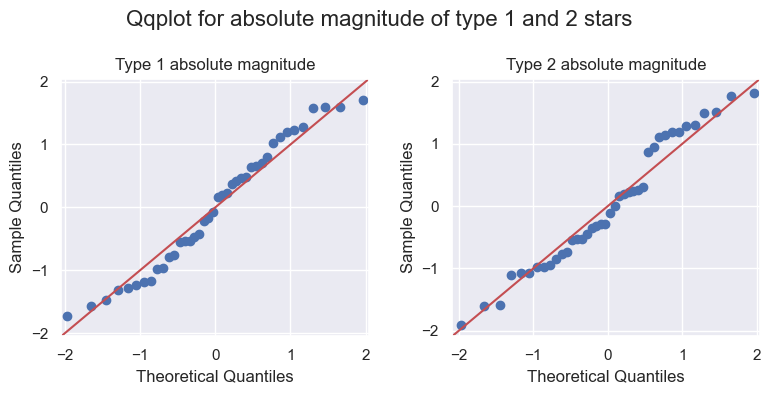

In [44]:
import statsmodels.api as sm

fig, ax = plt.subplots(1, 2, figsize= (8, 4))
fig.suptitle('Qqplot for absolute magnitude of type 1 and 2 stars', 
             fontsize= 16)
ax1 = sm.qqplot(data= star_df.query('star_type == 1')['absolute_magnitude'], 
                line= '45', fit= True, ax= ax[0])
ax[0].set_title('Type 1 absolute magnitude')
ax2 = sm.qqplot(data= star_df.query('star_type == 2')['absolute_magnitude'], 
                line= '45', fit= True, ax= ax[1])
ax[1].set_title('Type 2 absolute magnitude')
plt.tight_layout()

In [45]:
from scipy.stats import shapiro
stat1, pvalue1 = shapiro(star_df.query('star_type == 1')['absolute_magnitude'])

stat2, pvalue2 = shapiro(star_df.query('star_type == 2')['absolute_magnitude'])

In [46]:
pvalue1

0.10877764225006104

In [47]:
pvalue2

0.12470346689224243

shapiro-wilk test 해석

- p-value가 0.05보다 작으면 정규성을 따른다는 귀무가설 기각

위의 분석 결과에 따르면 타입 1과 타입 2는 정규성을 따른다는 귀무가설을 기각할 수 없고, n이 30보다 크므로 z test 수행 가능

In [48]:
am_type_1 = star_df.query('star_type == 1')['absolute_magnitude']
am_type_2 = star_df.query('star_type == 2')['absolute_magnitude']

In [49]:
from statsmodels.stats.weightstats import DescrStatsW

test_1 = DescrStatsW(am_type_1)
test_2 = DescrStatsW(am_type_2)
test = test_1.get_compare(test_2)
stat, pvalue = test.ztest_ind(alternative= 'two-sided', value= 0)
print(f'pvalue: {pvalue}')

pvalue: 0.8881790254590873


In [50]:
pvalue <= 0.05

False

**(시사점)** 두 타입의 절대등급은 차이가 나지 않는다는 귀무가설을 기각할 수 없음 -> 절대등급만으로 별의 타입을 분류하기는 어려움

## 2.2 데이터 시각화

### 2.2.1 histogram을 이용한 시각화 및 데이터 비교

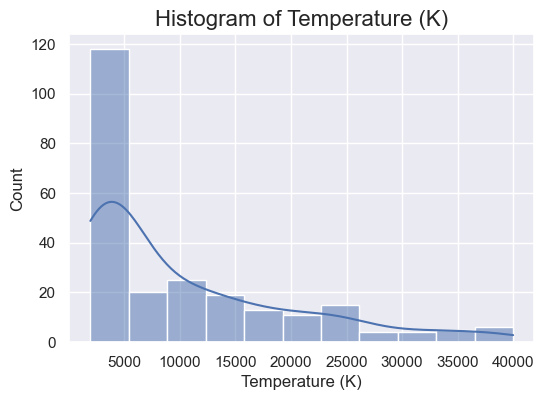

In [51]:
plt.figure(figsize= (6, 4))
ax = sns.histplot(data= star_df, x= 'temperature', kde = True)
ax.set_title("Histogram of Temperature (K)", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

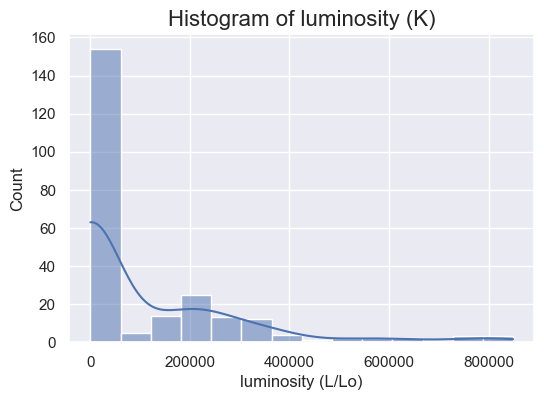

In [52]:
plt.figure(figsize= (6, 4))
ax = sns.histplot(data= star_df, x= 'luminosity', kde = True)
ax.set_title("Histogram of luminosity (K)", fontsize= 16)
plt.xlabel('luminosity (L/Lo)')
plt.show()

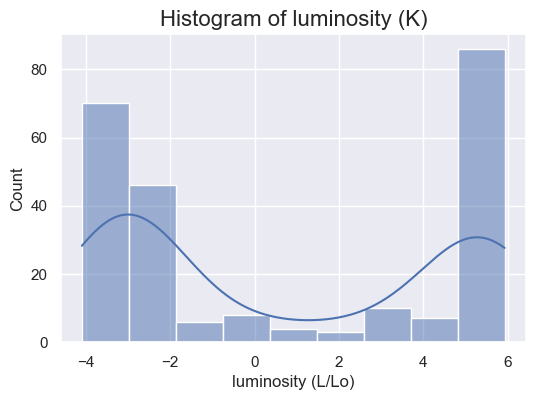

In [53]:
plt.figure(figsize= (6, 4))
ax = sns.histplot(data = star_df, x = np.log10(star_df['luminosity']), kde = True)
ax.set_title("Histogram of luminosity (K)", fontsize= 16)
plt.xlabel('luminosity (L/Lo)')
plt.show()

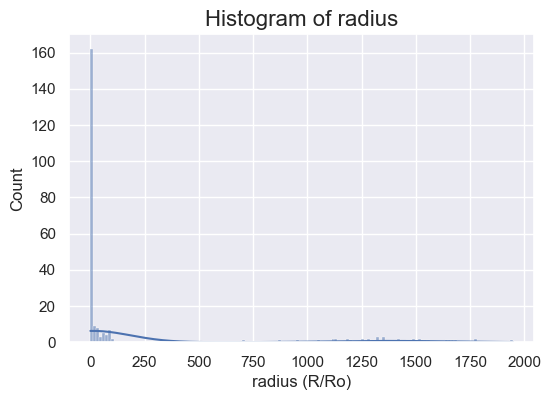

In [54]:
plt.figure(figsize= (6, 4))
ax = sns.histplot(data= star_df, x= 'radius', kde = True)
ax.set_title("Histogram of radius", fontsize= 16)
plt.xlabel('radius (R/Ro)')
plt.show()

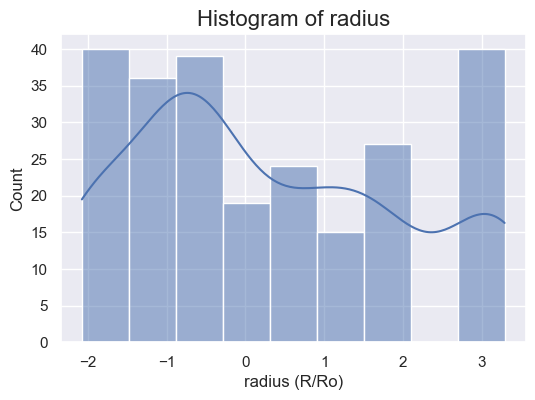

In [55]:
# 로그 함수 취해주기

plt.figure(figsize= (6, 4))
ax = sns.histplot(data = star_df, x = np.log10(star_df['radius']), kde = True)
ax.set_title("Histogram of radius", fontsize= 16)
plt.xlabel('radius (R/Ro)')
plt.show()

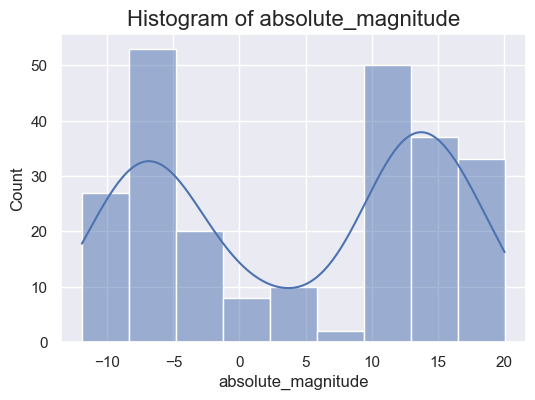

In [56]:
# 로그 함수 취해주기

plt.figure(figsize= (6, 4))
ax = sns.histplot(data = star_df, x = 'absolute_magnitude', kde = True)
ax.set_title("Histogram of absolute_magnitude", fontsize= 16)
plt.xlabel('absolute_magnitude')
plt.show()

### 2.2.2 box-plot을 이용한 시각화 및 데이터 비교

<AxesSubplot: >

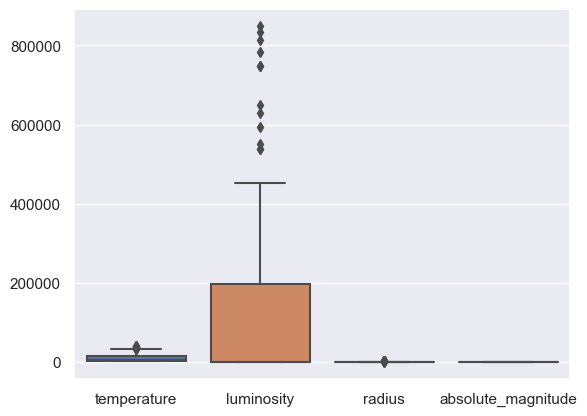

In [57]:
# 수치형 변수 전체 데이터 분포를 확인하기 위한 box-plot 1

sns.boxplot(data = star_df[['temperature', 'luminosity', 'radius', 'absolute_magnitude']])

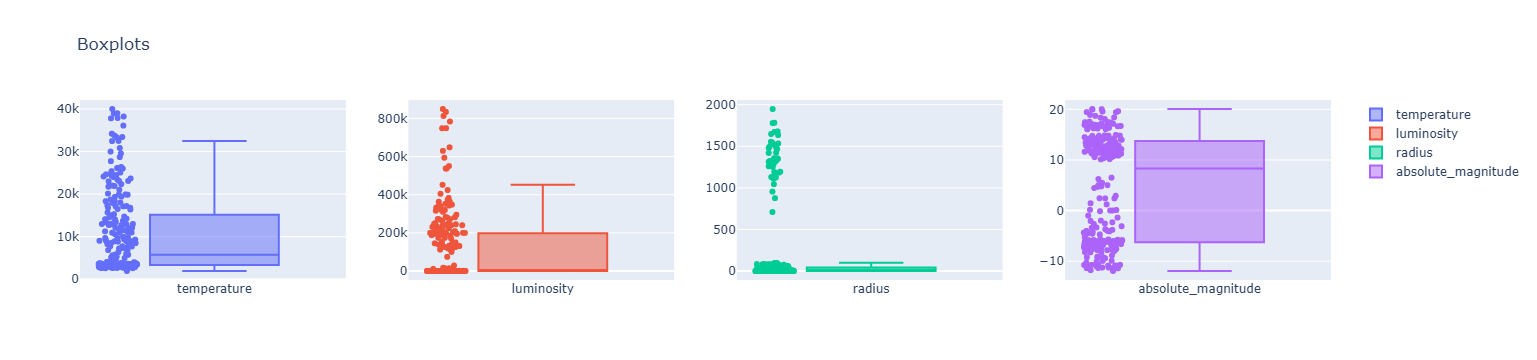

In [58]:
# 수치형 변수 전체 데이터 분포를 확인하기 위한 box-plot 2 (각 변수별 별도 축 사용)
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['temperature', 'luminosity', 'radius', 'absolute_magnitude']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=star_df[var],
        name=var),
        row=1, col=i+1
    )
fig.update_layout(
   title = 'Boxplots'
)
fig.update_traces(boxpoints='all', jitter=.3)

**(시사점)** 각 변수별 range와 scale의 차이가 큼 --> 추후 예측 모델 구축 시에는 normalization 또는 scaling 필요

#### 2.2.2.1 Star_type별 수치형(연속형) 변수의 분포 비교(box-plot)

<AxesSubplot: xlabel='star_type', ylabel='temperature'>

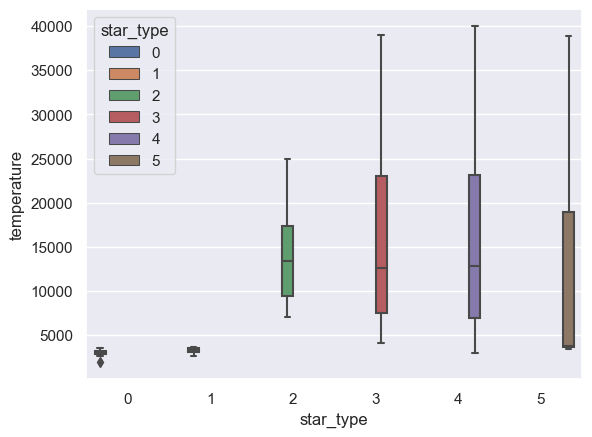

In [59]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, x="star_type", y="temperature", hue = "star_type")

<AxesSubplot: xlabel='star_type', ylabel='temperature'>

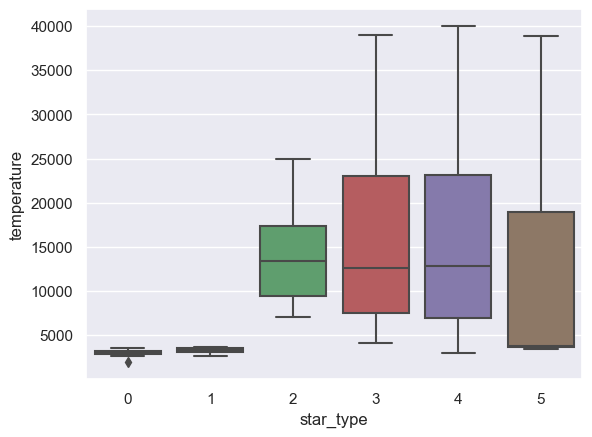

In [60]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, x="star_type", y="temperature")

<AxesSubplot: xlabel='star_type', ylabel='luminosity'>

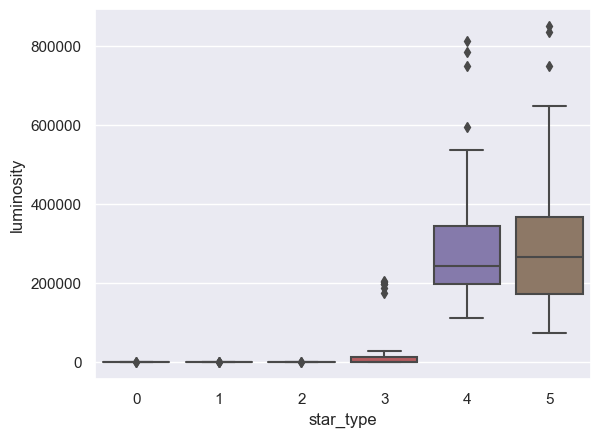

In [61]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, x="star_type", y="luminosity")

<AxesSubplot: xlabel='star_type', ylabel='radius'>

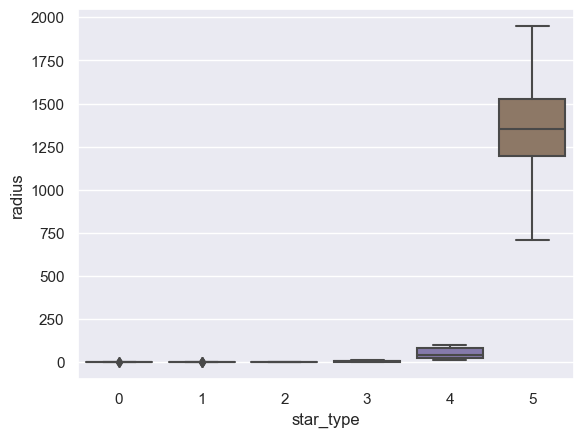

In [62]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, x="star_type", y="radius")

<AxesSubplot: xlabel='star_type', ylabel='absolute_magnitude'>

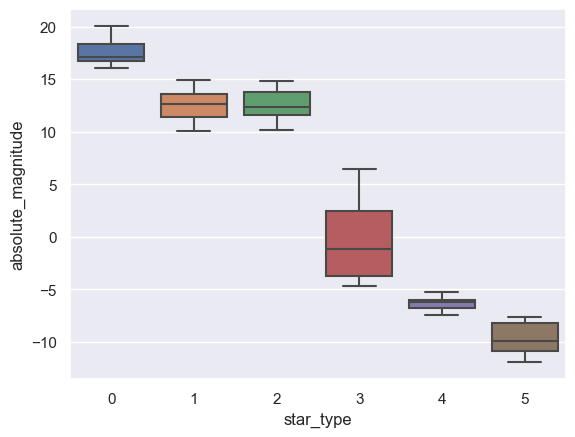

In [63]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, x="star_type", y="absolute_magnitude")

#### 2.2.2.2 spectral_class별 수치형(연속형) 변수의 분포 비교(box-plot)

<AxesSubplot: xlabel='spectral_class', ylabel='temperature'>

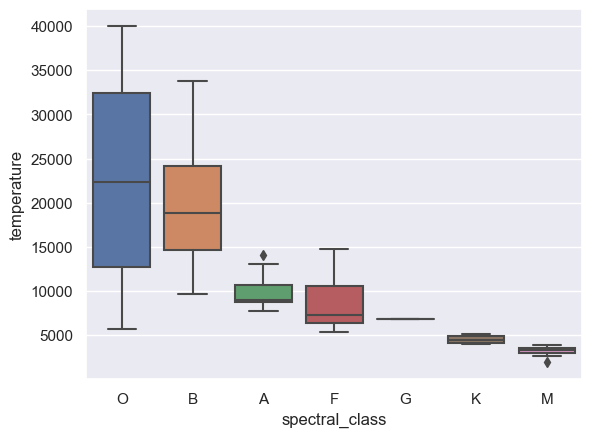

In [64]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, 
            x="spectral_class", 
            y="temperature", 
            order=['O', 'B', 'A', 'F', 'G', 'K', 'M'])

<AxesSubplot: xlabel='spectral_class', ylabel='luminosity'>

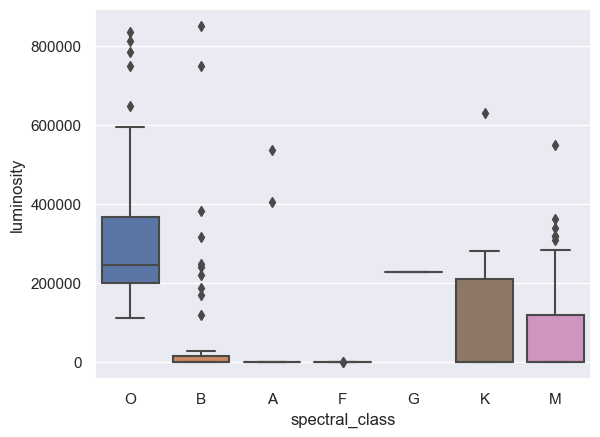

In [65]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, 
            x="spectral_class", 
            y="luminosity", 
            order=['O', 'B', 'A', 'F', 'G', 'K', 'M'])

<AxesSubplot: xlabel='spectral_class', ylabel='radius'>

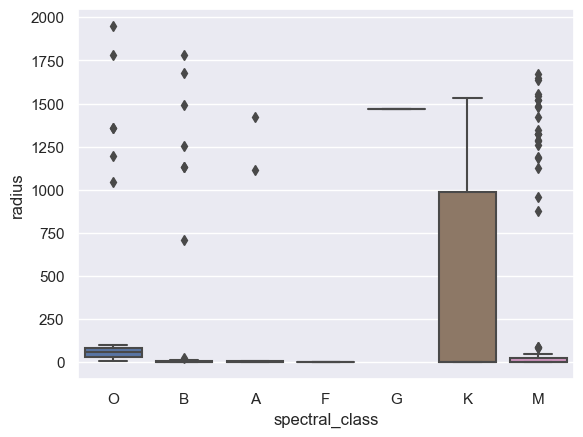

In [66]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, 
            x="spectral_class", 
            y="radius", 
            order=['O', 'B', 'A', 'F', 'G', 'K', 'M'])

<AxesSubplot: xlabel='spectral_class', ylabel='absolute_magnitude'>

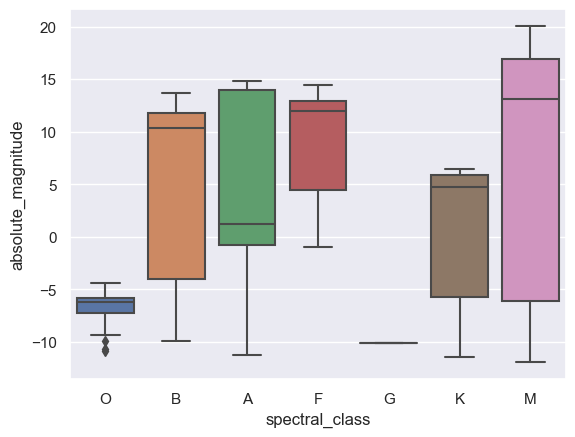

In [67]:
# 각 수치형 변수별 범주별 분포를 확인하기 위한 box-plot
sns.boxplot(data = star_df, 
            x="spectral_class", 
            y="absolute_magnitude", 
            order=['O', 'B', 'A', 'F', 'G', 'K', 'M'])

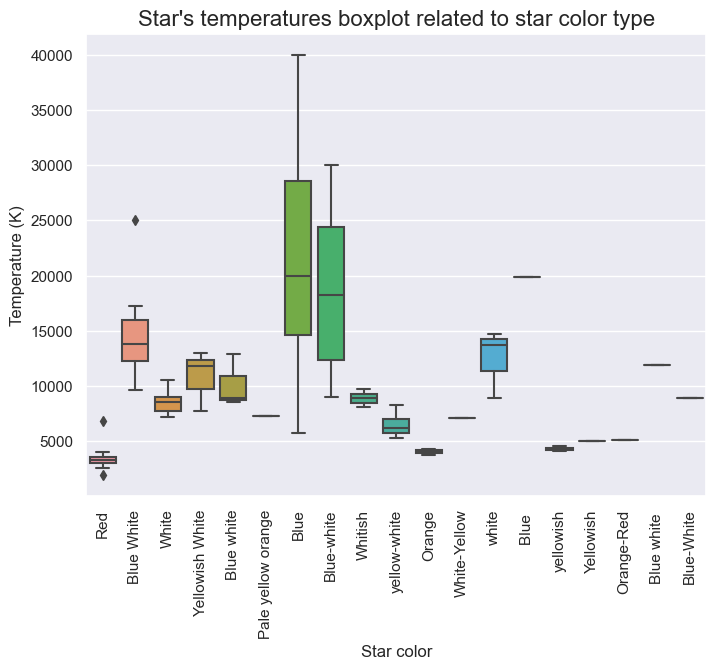

In [68]:
plt.figure(figsize= (8, 6))
ax = sns.boxplot(data= star_df, x= 'star_color', y= 'temperature')
ax.set_title("Star's temperatures boxplot related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Temperature (K)')
plt.xticks(rotation= 'vertical')
plt.show()

### 2.2.3 heat_map을 이용한 변수 간 상관관계 확인

In [69]:
# 수치형 변수와 star_class 간 상관관계 확인
numeric_df = star_df[['temperature', 'luminosity', 'radius', 'absolute_magnitude', 'star_type']]
print(numeric_df.head())
numeric_df.info()

   temperature  luminosity  radius  absolute_magnitude  star_type
0         3068    2.40e-03    0.17               16.12          0
1         3042    5.00e-04    0.15               16.60          0
2         2600    3.00e-04    0.10               18.70          0
3         2800    2.00e-04    0.16               16.65          0
4         1939    1.38e-04    0.10               20.06          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         240 non-null    int64  
 1   luminosity          240 non-null    float64
 2   radius              240 non-null    float64
 3   absolute_magnitude  240 non-null    float64
 4   star_type           240 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 9.5 KB


<AxesSubplot: >

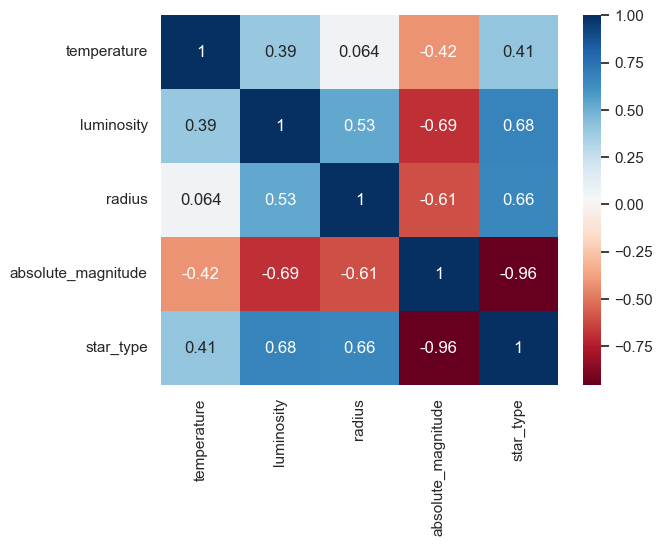

In [70]:
corr = numeric_df.corr()
sns.heatmap(corr, annot = True, cmap = "RdBu")

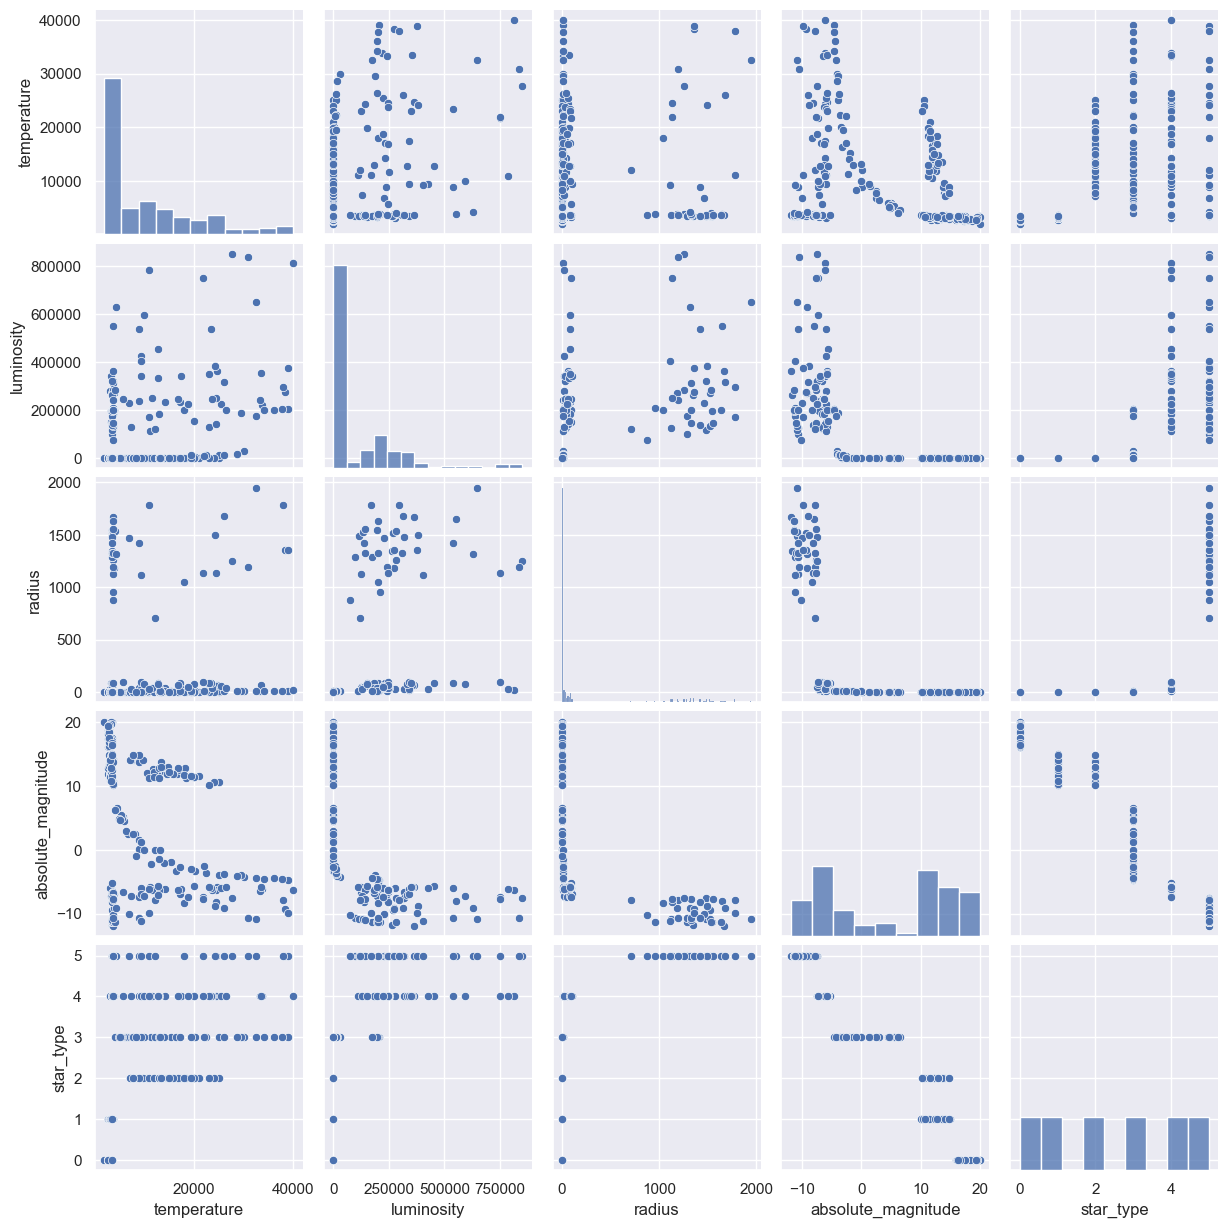

In [71]:
# pairplot 확인
sns.pairplot(numeric_df)

In [72]:
# log_scale로 변환 
log_cnvt_numeric_df = numeric_df.copy()
log_cnvt_numeric_df['log_temperature'] = np.log10(numeric_df['temperature'])
log_cnvt_numeric_df['log_luminosity'] = np.log10(numeric_df['luminosity'])
log_cnvt_numeric_df['log_radius'] = np.log10(numeric_df['radius'])

log_cnvt_numeric_df.head()

temperature  luminosity  radius  absolute_magnitude  star_type  \
0         3068    2.40e-03    0.17               16.12          0   
1         3042    5.00e-04    0.15               16.60          0   
2         2600    3.00e-04    0.10               18.70          0   
3         2800    2.00e-04    0.16               16.65          0   
4         1939    1.38e-04    0.10               20.06          0   

   log_temperature  log_luminosity  log_radius  
0             3.49           -2.62       -0.77  
1             3.48           -3.30       -0.81  
2             3.41           -3.52       -0.99  
3             3.45           -3.70       -0.80  
4             3.29           -3.86       -0.99

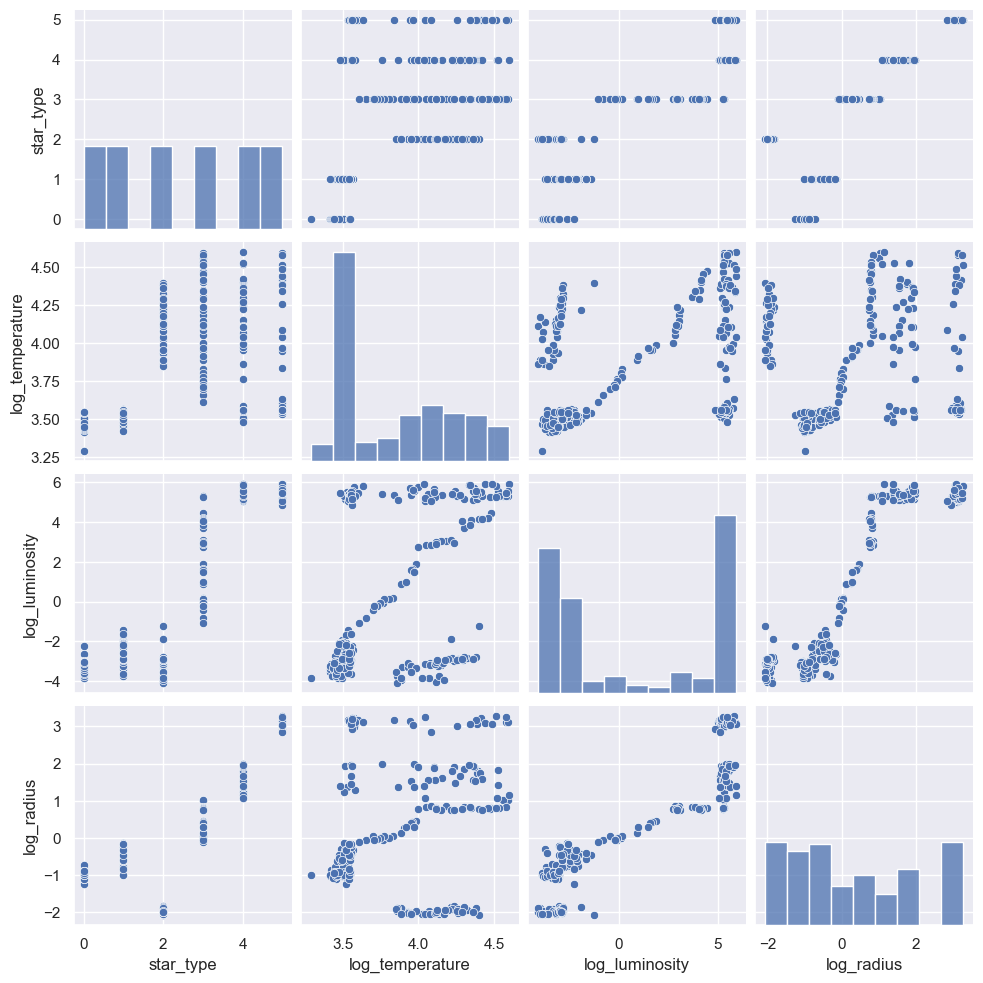

In [73]:
# log scale의 pair plot 그리기 
sns.pairplot(log_cnvt_numeric_df[['star_type', 'log_temperature', 'log_luminosity', 'log_radius']])

### 2.2.4 scatter-plot을 이용한 밝기(등급)과 온도 간 상관관계 확인 (H-R도)

matplotlib을 이용한 고전적인 H-R도 그리기

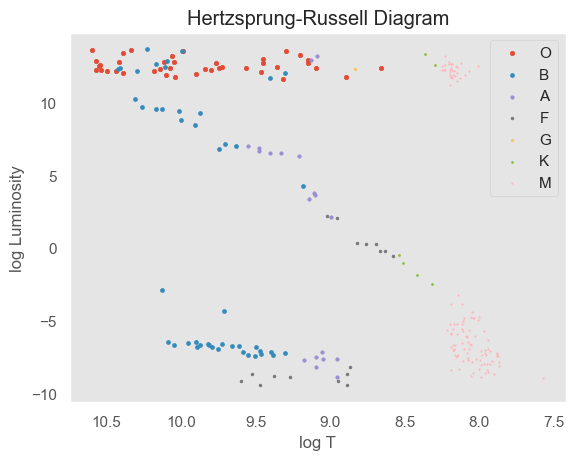

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

O = star_df[star_df["spectral_class"] == 'O']
B = star_df[star_df["spectral_class"] == 'B']
A = star_df[star_df["spectral_class"] == 'A']
F = star_df[star_df["spectral_class"] == 'F']
G = star_df[star_df["spectral_class"] == 'G']
K = star_df[star_df["spectral_class"] == 'K']
M = star_df[star_df["spectral_class"] == 'M']

# 온도 - 광도 간 상관도
plt.grid()
plt.scatter(np.log(O["temperature"]), np.log(O["luminosity"]), 10, label = 'O')
plt.scatter(np.log(B["temperature"]), np.log(B["luminosity"]), 8, label = 'B')
plt.scatter(np.log(A["temperature"]), np.log(A["luminosity"]), 6, label = 'A')
plt.scatter(np.log(F["temperature"]), np.log(F["luminosity"]), 4, label = 'F')
plt.scatter(np.log(G["temperature"]), np.log(G["luminosity"]), 3, label = 'G')
plt.scatter(np.log(K["temperature"]), np.log(K["luminosity"]), 2, label = 'K')
plt.scatter(np.log(M["temperature"]), np.log(M["luminosity"]), 1, label = 'M')

plt.gca().invert_xaxis()
plt.title("Hertzsprung-Russell Diagram")
plt.ylabel("log Luminosity")
plt.xlabel("log T")
plt.legend()

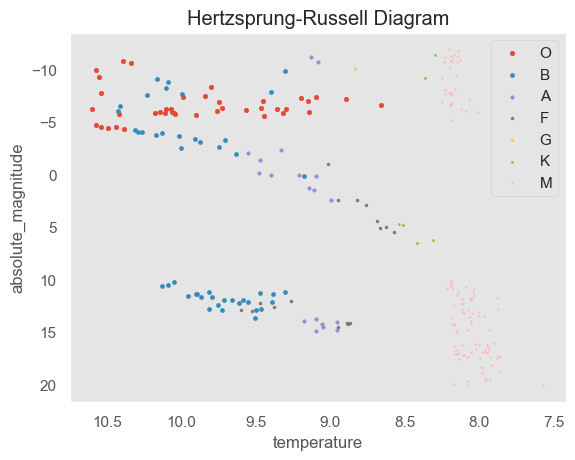

In [75]:
# 온도 - 절대 등급 간 상관도
plt.grid()
plt.scatter(np.log(O["temperature"]), O["absolute_magnitude"], 10, label = 'O')
plt.scatter(np.log(B["temperature"]), B["absolute_magnitude"], 8, label = 'B')
plt.scatter(np.log(A["temperature"]), A["absolute_magnitude"], 6, label = 'A')
plt.scatter(np.log(F["temperature"]), F["absolute_magnitude"], 4, label = 'F')
plt.scatter(np.log(G["temperature"]), G["absolute_magnitude"], 3, label = 'G')
plt.scatter(np.log(K["temperature"]), K["absolute_magnitude"], 2, label = 'K')
plt.scatter(np.log(M["temperature"]), M["absolute_magnitude"], 1, label = 'M')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Hertzsprung-Russell Diagram")
plt.ylabel("absolute_magnitude")
plt.xlabel("temperature")
plt.legend()

![image.jpg](hr_diagram.jpg)

[출처] 한국천문연구원_항성의 진화 https://astro.kasi.re.kr/learning/pageView/6373

---

# 3. star_type 분류 모델 생성

### 3.1 몇 가지 대표적인 분류 알고리즘 적용 

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split

In [77]:
# 범주형 변수에 대해 더미변수 생성
star_dummy_df = pd.get_dummies(star_df, prefix = ['star_color', 'spectral_class'],
                       columns = ['star_color', 'spectral_class'])
star_dummy_df.columns.values

array(['temperature', 'luminosity', 'radius', 'absolute_magnitude',
       'star_type', 'star_color_Blue', 'star_color_Blue ',
       'star_color_Blue White', 'star_color_Blue white',
       'star_color_Blue white ', 'star_color_Blue-White',
       'star_color_Blue-white', 'star_color_Orange',
       'star_color_Orange-Red', 'star_color_Pale yellow orange',
       'star_color_Red', 'star_color_White', 'star_color_White-Yellow',
       'star_color_Whitish', 'star_color_Yellowish',
       'star_color_Yellowish White', 'star_color_white',
       'star_color_yellow-white', 'star_color_yellowish',
       'spectral_class_A', 'spectral_class_B', 'spectral_class_F',
       'spectral_class_G', 'spectral_class_K', 'spectral_class_M',
       'spectral_class_O'], dtype=object)

In [78]:
star_dummy_df.head()

temperature  luminosity  radius  absolute_magnitude  star_type  \
0         3068    2.40e-03    0.17               16.12          0   
1         3042    5.00e-04    0.15               16.60          0   
2         2600    3.00e-04    0.10               18.70          0   
3         2800    2.00e-04    0.16               16.65          0   
4         1939    1.38e-04    0.10               20.06          0   

   star_color_Blue  star_color_Blue   star_color_Blue White  \
0                0                 0                      0   
1                0                 0                      0   
2                0                 0                      0   
3                0                 0                      0   
4                0                 0                      0   

   star_color_Blue white  star_color_Blue white   ...  star_color_white  \
0                      0                       0  ...                 0   
1                      0                       0  ...                 0   
2                      0                       0  ...                 0   
3                      0                       0  ...                 0   
4                      0                       0  ...                 0   

   star_color_yellow-white  star_color_yellowish  spectral_class_A  \
0                        0                     0                 0   
1                        0                     0                 0   
2                        0                     0                 0   
3                        0                     0                 0   
4                        0                     0                 0   

   spectral_class_B  spectral_class_F  spectral_class_G  spectral_class_K  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   spectral_class_M  spectral_class_O  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 1                 0  
4                 1                 0  

[5 rows x 31 columns]

In [79]:
star_dummy_df.shape

(240, 31)

In [80]:
X = star_dummy_df.drop('star_type', 1)
y = star_dummy_df['star_type']
X.shape

(240, 30)

In [81]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: star_type, dtype: int64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle = True, 
                                                    random_state = 10, 
                                                    test_size = 0.3)

In [83]:
# 베스트 모델을 선택하는 함수 정의
def choose_the_best_model(models, X_train, y_train, X_test, y_test):
    accuracy=[]
    for i in models:
        model = i
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
        
    result={"models"  : models,"accuracy" : accuracy}
    result=pd.DataFrame(result).sort_values(by = 'accuracy', ascending = False)
    return result

In [84]:
# 테스트 데이터에 대한 accuracy 확인

import warnings
warnings.filterwarnings('ignore')

models=[LogisticRegression(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        GaussianNB()]

choose_the_best_model(models,X_train,y_train,X_test,y_test)

models  accuracy
1  (DecisionTreeClassifier(max_features='auto', r...      1.00
2                           DecisionTreeClassifier()      0.99
4                                       GaussianNB()      0.86
3                             KNeighborsClassifier()      0.65
0                               LogisticRegression()      0.56

### 3.2 auto-ml 모델을 이용한 최적 분류 모델 선택

In [85]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 48.23it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearSVC                          1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
SGDClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
Perceptron                         1.00               1.00    None      1.00   
LogisticRegression                 1.00               1.00    None      1.00   
LGBMClassifier                     1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
CalibratedClassifierCV             1.00               1.00    None      1.00   
LinearDiscriminantAnalysis         0.99               0.98    None      0.99   
LabelPropagation                   0.97               0.97    None      0.97   
LabelSpreading                     0.97               0.97    None      0.97   
GaussianNB                         0.97               0.97    None      0.97   
PassiveAggressiveClassifier        0.96               0.96    None      0.96   
ExtraTreeClassifier                0.94               0.95    None      0.94   
KNeighborsClassifier               0.92               0.91    None      0.92   
NearestCentroid                    0.92               0.90    None      0.92   
RidgeClassifier                    0.90               0.90    None      0.90   
RidgeClassifierCV                  0.90               0.90    None      0.90   
NuSVC                              0.89               0.87    None      0.89   
AdaBoostClassifier                 0.82               0.83    None      0.76   
SVC                                0.74               0.77    None      0.67   
BernoulliNB                        0.71               0.74    None      0.64   
DummyClassifier                    0.11               0.17    None      0.02   
QuadraticDiscriminantAnalysis      0.21               0.17    None      0.07   

                               Time Taken  
Model                                      
LinearSVC                            0.01  
BaggingClassifier                    0.01  
XGBClassifier                        0.11  
SGDClassifier                        0.01  
RandomForestClassifier               0.07  
Perceptron                           0.01  
LogisticRegression                   0.01  
LGBMClassifier                       0.07  
DecisionTreeClassifier               0.01  
ExtraTreesClassifier                 0.06  
CalibratedClassifierCV               0.05  
LinearDiscriminantAnalysis           0.01  
LabelPropagation                     0.01  
LabelSpreading                       0.01  
GaussianNB                           0.01  
PassiveAggressiveClassifier          0.01  
ExtraTreeClassifier                  0.00  
KNeighborsClassifier                 0.01  
NearestCentroid                      0.01  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.01  
NuSVC                                0.01  
AdaBoostClassifier                   0.05  
SVC                                  0.01  
BernoulliNB                          0.00  
DummyClassifier                      0.01  
QuadraticDiscriminantAnalysis        0.01

### 3.3 변수 중요도 확인

In [86]:
# 랜덤 포레스트 모델로 확인 
model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({'features' : X_train.columns,
                                    'feature_importance' : model.feature_importances_})
feature = feature_importances.copy()
feature1 = feature_importances.copy()
feature1.sort_values('feature_importance', ascending = False)

features  feature_importance
3              absolute_magnitude                0.27
2                          radius                0.25
1                      luminosity                0.17
0                     temperature                0.10
14                 star_color_Red                0.05
28               spectral_class_M                0.04
29               spectral_class_O                0.03
4                 star_color_Blue                0.03
24               spectral_class_B                0.02
10          star_color_Blue-white                0.01
21        star_color_yellow-white                0.00
23               spectral_class_A                0.00
25               spectral_class_F                0.00
6           star_color_Blue White                0.00
27               spectral_class_K                0.00
15               star_color_White                0.00
11              star_color_Orange                0.00
19     star_color_Yellowish White                0.00
26               spectral_class_G                0.00
20               star_color_white                0.00
9           star_color_Blue-White                0.00
18           star_color_Yellowish                0.00
12          star_color_Orange-Red                0.00
8          star_color_Blue white                 0.00
16        star_color_White-Yellow                0.00
13  star_color_Pale yellow orange                0.00
17             star_color_Whitish                0.00
5                star_color_Blue                 0.00
7           star_color_Blue white                0.00
22           star_color_yellowish                0.00

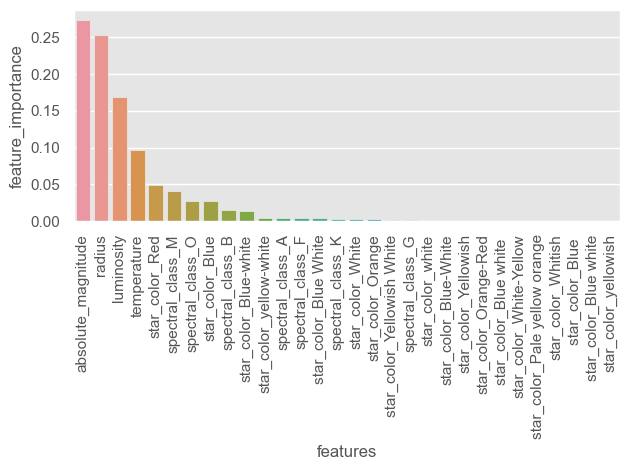

In [87]:
feature_df = feature1.sort_values('feature_importance', ascending = False)
feature_df2 = feature_df.reset_index(drop = True)
feature_df2.head()

sns.barplot(data = feature_df2, x = "features", y = "feature_importance")
plt.xticks(rotation= "vertical")
plt.tight_layout()

### 3.4 선택 모델의 성능 검증

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
y_hat = model.predict(X_test)

In [90]:
print(f'Accuracy: {round(accuracy_score(y_test, y_hat) * 100, 2)}%')

Accuracy: 100.0%


* 분류 결과 보고서 출력

In [91]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        13

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



![image.png](confusion_matrix.png)

[출처] https://www.kaggle.com/discussions/getting-started/351680

![image.png](confusion_matrix2.png)

[출처] https://www.unite.ai/what-is-a-confusion-matrix/



# Appendix A. open data set

몇 가지 color magnitude diagram 관련 open data set 정리

> **(GAIA 위성 데이터)** https://allendowney.github.io/AstronomicalData/README.html
>
> **(HYG 데이터 베이스)** http://www.astronexus.com/hyg  /  https://github.com/astronexus/HYG-Database
>
> **(Star Type Classification)**  https://www.kaggle.com/datasets/brsdincer/star-type-classification
>
> **(Star Dataset for Stellar Classification)** https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs
>
> **(Star dataset to predict star types)** https://www.kaggle.com/datasets/deepu1109/star-dataset
>
> **(Star-Galaxy Classification Data - image set)** https://www.kaggle.com/datasets/divyansh22/dummy-astronomy-data
>
> **(Stellar Classification Dataset - SDSS17)** https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17  /  https://arxiv.org/pdf/2112.02026.pdf
>
> **(Predicting Pulsar Star)** https://archive.ics.uci.edu/ml/datasets/HTRU2  /  https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate
> 
> **(기타 포스팅)** https://towardsdatascience.com/tagged/astronomy